In [1]:
%matplotlib inline
#
from LRGSG_package.shared import *
from LRGSG_package.config.utils import log_binning
from LRGSG_package.LRGSG import Lattice2D, SignedRW, move_to_rootf
#
move_to_rootf()
plt.style.use("ipynb/nb_plotsheet.mplstyle")

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


Current value of p: 0.01
[215   6   5 ...  43  34 114]
Current value of p: 0.05
[25  7 19 ...  3  2 93]
Current value of p: 0.08
[44 33  1 ... 12  8  2]
Current value of p: 0.1
[10  1  3 ... 25  1 24]
Current value of p: 0.2
[ 1  2  3 ... 26  4  7]
Current value of p: 0.5
[4 1 1 ... 3 1 5]


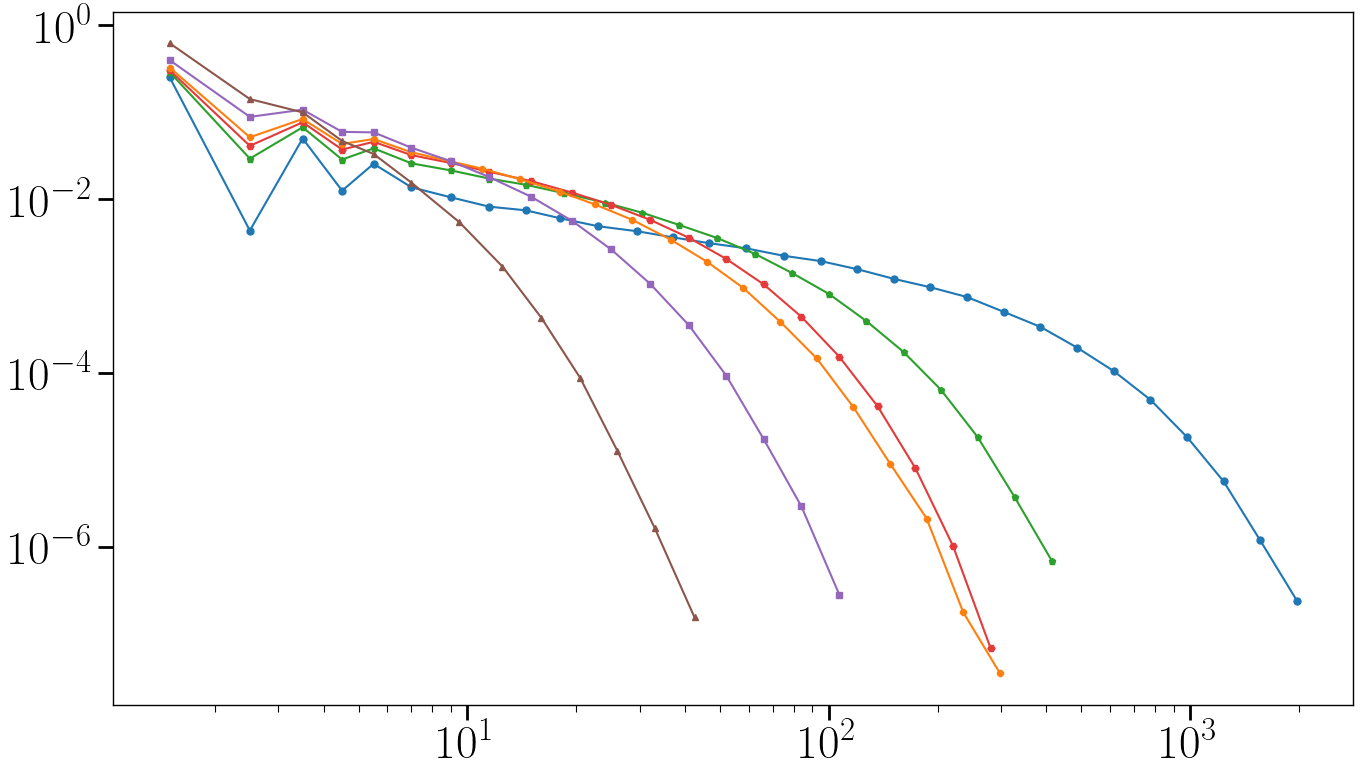

In [7]:
fig, ax = plt.subplots()
for p in [0.01, 0.05, 0.08, 0.1, 0.2, 0.5]:
    print("Current value of p:", p)  # Debugging statement to check p
    l = Lattice2D(128, pflip=p)
    l.flip_random_fract_edges()
    srw = SignedRW(l, simTime=2000, 
               initMode="random", 
               runMode="py",
               storeMode="sequential",
               storeFreq=1)
    srw.run()
    a = np.array(srw.s_tList, dtype=object)[:, 1].astype(int)
    changes = np.where(np.diff(a) != 0)[0] + 1
    sequence_lengths = np.diff(np.hstack(([0], changes, [len(a)])))
    print(sequence_lengths)
    # b, h, w = log_binning(sequence_lengths, binnum=15)
    # ax.plot(b, h/w)
    edges, hist = powerlaw.pdf(sequence_lengths)
    bin_centers = (edges[1:]+edges[:-1])/2.0
    ax.loglog(bin_centers, hist)
plt.show()

In [ ]:
b, h, w = log_binning(sequence_lengths, binnum=15)
plt.plot(b, h/w)
plt.yscale("log")
plt.xscale("log")

In [ ]:
a.alpha